In [1]:
#Data Loading
import pandas as pd
df=pd.read_csv('mtsamples.csv')
list(df.columns)

In [3]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [4]:
#Drop irrelevant columns:

del df['Unnamed: 0']
df_classify=df[["transcription","medical_specialty"]]
#df_classify[["medical_specialty"]]
df_classify['medical_specialty']=df_classify['medical_specialty'].str.strip()
df_classify.describe()

In [10]:
#Drop Null values:

#df_classify.isnull()
import numpy as np
#df_classify.notnull().sum().sort_values(ascending=False)
nullindex=np.where(df_classify['transcription'].isnull() == True)[0]
#df_classifynotnull = pd.isnull(df_classify["transcription"])=True 
#df_classify.dropna(inplace=True)
nullindex

df_classify.drop(nullindex,inplace = True)
df_classify.shape

C:\Users\Farhana\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
df_classify[["medical_specialty"]].value_counts()

medical_specialty            
Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Dentistry                          27
Cosmetic / Plastic S

Text(0.5, 1.0, 'Comparison between different medical specialities')

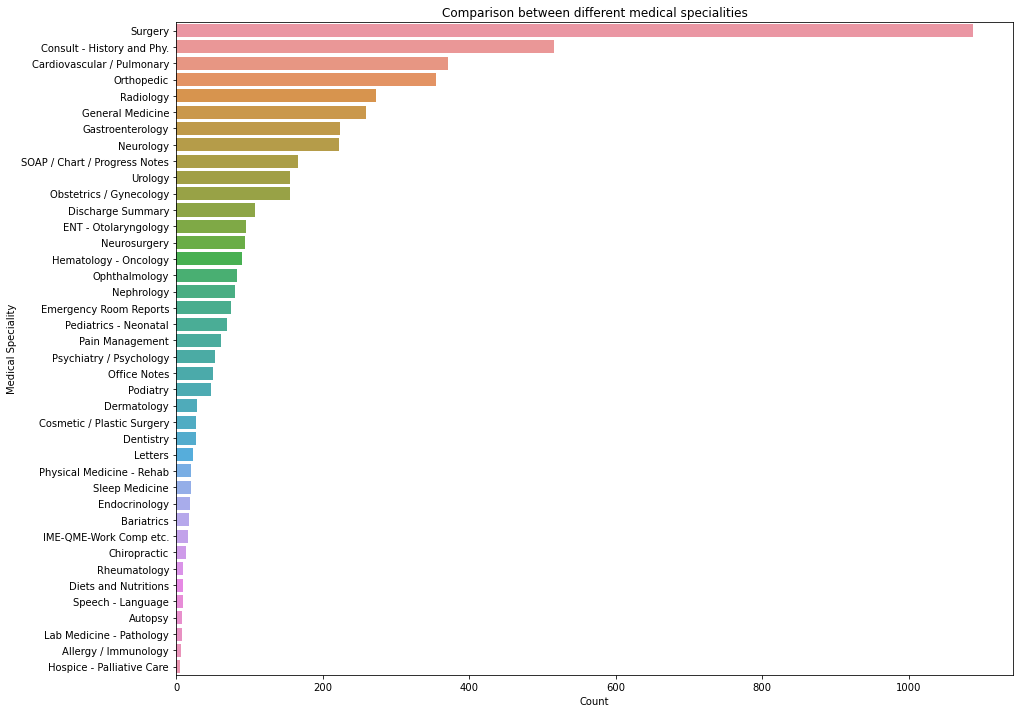

In [13]:
#Barplot of raw data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_count = df_classify['medical_specialty'].value_counts()
df_count
y = np.array(df_count.index)
x = np.array(df_count.values)
plt.figure(figsize=(15,12))
sns.barplot(x=x,y=y)
plt.ylabel('Medical Speciality')
plt.yticks(rotation=0)
plt.xlabel('Count')
plt.title('Comparison between different medical specialities')
#plt.savefig('Sentiment.eps')


In [15]:
#Remove irrelevant classes
names=((df_classify[["medical_specialty"]].value_counts()).index)
selected=names[np.where(df_classify[["medical_specialty"]].value_counts()>50)]
removed_cat=list(['Discharge Summary','Consult - History and Phy.','SOAP / Chart / Progress Notes','Emergency Room Reports','Office Notes',
                 'Letters','Surgery','Orthopedic','Radiology','General Medicine'])

import functools
import operator
aList=list(functools.reduce(operator.add, (selected)))
df_new=df_classify[df_classify['medical_specialty'].isin(aList)]
df_new.shape

df_new2=df_new[~df_new['medical_specialty'].isin(removed_cat)]
df_new=df_new2
df_new.reset_index(inplace=True)
del df_new['index']
df_new.head()


,transcription,medical_specialty
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary
1,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary
4,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary


In [16]:
from sklearn import preprocessing
target = preprocessing.LabelEncoder()
target.fit(df_new['medical_specialty'])
target.classes_

array(['Cardiovascular / Pulmonary', 'ENT - Otolaryngology',
       'Gastroenterology', 'Hematology - Oncology', 'Nephrology',
       'Neurology', 'Neurosurgery', 'Obstetrics / Gynecology',
       'Ophthalmology', 'Pain Management', 'Pediatrics - Neonatal',
       'Psychiatry / Psychology', 'Urology'], dtype=object)

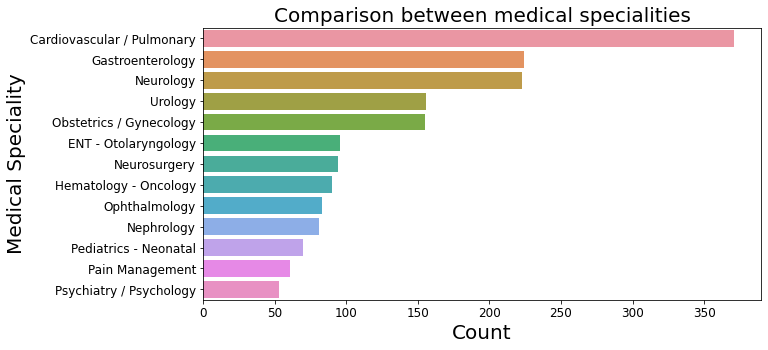

In [17]:
#Barplot of cleaned data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_count2 = df_new['medical_specialty'].value_counts()
#df_count2
x = np.array(df_count2.values)
y = np.array(df_count2.index)
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y)
#plt.yticks(rotation=0)
plt.xlabel('Count',fontsize=20)
plt.ylabel('Medical Speciality',fontsize=20)
plt.title('Comparison between medical specialities',fontsize=20)


plt.tick_params(direction='out', labelsize='large')
plt.savefig('data.svg')


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
#Data Cleaning using spacy 

import spacy

nlp = spacy.load("en_core_web_lg")#, disable=["tagger", "parser", "ner"])
stop=["PROCEDURE","DIAGNOSIS","DESCRIPTION","PREOPERATIVE","PAST","SUBJECTIVE"]        
def preprocess(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if (token.is_stop ==False and token.lemma_ not in stop 
                                              and len(token.lemma_)>1 and token.lemma_.isalpha()==True)]

In [20]:
#preprocessed=preprocess(df_new['transcription'])
df_new['preprocessed'] = df_new['transcription'].apply(preprocess)
df_new.head()
#df_new[df_new['medical_specialty'].isin(list(['Nephrology']))].iloc[1:]


In [23]:
#Merge preprocesded data
import string
def cleaned(dat):
    all_spam_cleaned = []
    for text in dat:
        text = [x.strip(string.punctuation) for x in text]
        all_spam_cleaned.append(text)
    text_spam = ["".join(text) for text in all_spam_cleaned]
    final_text_spam = " ".join(text_spam)
    return(final_text_spam)

#cleaned(df_new['preprocessed'][0])

df_new['cleaned']=df_new['preprocessed'].apply(cleaned)


In [24]:
df_new.head()

,transcription,medical_specialty,preprocessed,cleaned
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary,"[MODE, left, atrial, enlargement, left, atrial...",MODE left atrial enlargement left atrial diame...
1,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary,"[left, ventricular, cavity, size, wall, thickn...",left ventricular cavity size wall thickness ap...
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",Cardiovascular / Pulmonary,"[ECHOCARDIOGRAM, multiple, view, heart, great,...",ECHOCARDIOGRAM multiple view heart great vesse...
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Cardiovascular / Pulmonary,"[normal, cardiac, chamber, size, normal, left,...",normal cardiac chamber size normal left ventri...
4,"2-D STUDY,1. Mild aortic stenosis, widely calc...",Cardiovascular / Pulmonary,"[mild, aortic, stenosis, widely, calcify, mini...",mild aortic stenosis widely calcify minimally ...


In [25]:
#Splitting data to train and test:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_new['cleaned'],
                                   df_new['medical_specialty'],
                                   test_size=0.30, random_state=42)

In [26]:
#Load all libraries
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_confusion_matrix
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.ensemble  import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


In [27]:
# Multinomial Naive Bayes Classification

pipeline1 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB()),])

parameters1 = {
    'vect__ngram_range': ((1, 2),(1, 3)),  # unigrams or bigrams
    'vect__analyzer': ('char','word'),
    'vect__max_df':[0.75,0.95],
    'vect__min_df': [5],
    'vect__max_features': [2000],
    'clf__alpha': [0.05,0.1,0.2],
    'clf__fit_prior':['True','False']
   }
#parameters1 = {
 #   'vect__ngram_range': [(1,4)],  # unigrams or bigrams
  #  'vect__analyzer': ['char_wb'],
   # 'vect__max_df':[0.95],
    #'vect__min_df': [5],
    #'vect__max_features': [5000],
    #'clf__alpha': [0.1],
   #}




grid_search1 = GridSearchCV(pipeline1, parameters1, cv=5,n_jobs=-1, verbose=1)

Multi_fit=grid_search1.fit(X_train, y_train)

print("Best parameter (Best CV score=%0.3f) from MultinomialNB classifier:" % grid_search1.best_score_)
print(grid_search1.best_params_)
Multi_fit_model= grid_search1.best_estimator_
pred1 = Multi_fit_model.predict(X_test)

print("Classification Report of MultinomialNB classifier: ")
print(classification_report(y_test, pred1),"\n")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameter (Best CV score=0.766) from MultinomialNB classifier:
{'clf__alpha': 0.2, 'clf__fit_prior': 'True', 'vect__analyzer': 'word', 'vect__max_df': 0.95, 'vect__max_features': 2000, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}
Classification Report of MultinomialNB classifier: 
                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.83      0.93      0.88       106
      ENT - Otolaryngology       0.92      0.66      0.77        35
          Gastroenterology       0.78      0.74      0.76        68
     Hematology - Oncology       0.52      0.52      0.52        23
                Nephrology       0.75      0.20      0.32        30
                 Neurology       0.70      0.84      0.76        63
              Neurosurgery       0.65      0.71      0.68        28
   Obstetrics / Gynecology       0.94      0.69      0.80        48
             Ophthalmology       0.

Accuracy scored from MultinomialNB classifier:  0.75 

Precision: 0.742629
Recall: 0.709875
F1 score: 0.708143
Confusion_matrix of MultinomialNB classifier:


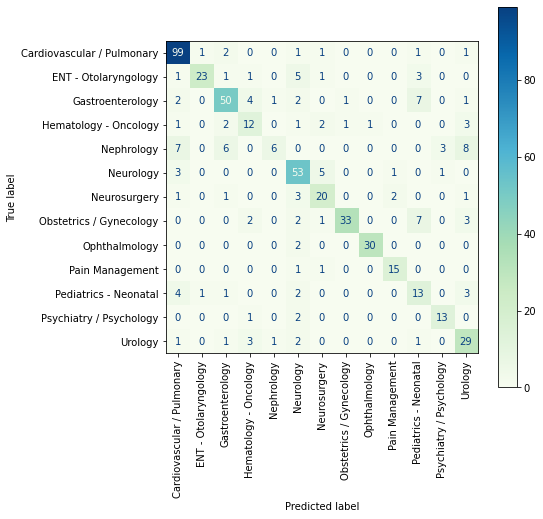

In [28]:
#Results from MultinomialNB Classifier:

# accuracy: (tp + tn) / (p + n)
accuracy_1=accuracy_score(y_test, pred1)
print("Accuracy scored from MultinomialNB classifier: ",accuracy_1,"\n")
conmax1=confusion_matrix(y_test, pred1)
# precision tp / (tp + fp)
precision1 = precision_score(y_test, pred1,average='macro')
print('Precision: %f' % precision1)
# recall: tp / (tp + fn)
recall1 = recall_score(y_test, pred1,average='macro')
print('Recall: %f' % recall1)
# f1: 2 tp / (2 tp + fp + fn)
f1_1 = f1_score(y_test, pred1,average='macro')
print('F1 score: %f' % f1_1)
print("Confusion_matrix of MultinomialNB classifier:")
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(Multi_fit,X_test,y_test,display_labels=target.classes_,
                      cmap='GnBu',xticks_rotation='vertical',
                      normalize=None,values_format='g',
                      ax=ax)

plt.savefig('Multi_fit.svg')


In [29]:
#Linear Support Vector Classifier

pipeline2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf1', LinearSVC(random_state=42)),
])

kfold = StratifiedKFold(n_splits = 5 )

parameters2 = {
    'vect__ngram_range': ((1,2),(1,3)) , # unigrams or bigrams
    'vect__analyzer': ('word','char'),
    'vect__max_df':(0.75,0.95),
    'vect__min_df': [5],
    'vect__max_features': [2000],
    'clf1__loss':['squared_hinge'],
    'clf1__C': [0.2,0.3,0.5]
}

#parameters2 = {
 #   'vect__ngram_range': [(1,2),(1,3)] , # unigrams or bigrams
  #  'vect__analyzer': ['word','char'],
   # 'vect__max_df':[0.95],
    #'vect__min_df': [5],
   # 'vect__max_features': [2000],
    #'clf1__loss':['squared_hinge'],
    #'clf1__C': [0.2,0.3]
#}

grid_search2 = GridSearchCV(pipeline2,parameters2 , cv=kfold, n_jobs=-1, verbose=1) #verbose = 1, cv = kfold, n_jobs = 3)
LinearSVC_fit=grid_search2.fit(X_train, y_train)
LinearSVC_fit_model = grid_search2.best_estimator_
pred2 = LinearSVC_fit_model.predict(X_test) 


print("Best parameter (Best CV score=%0.3f) from LinearSVC classifier:" % grid_search2.best_score_)
print(grid_search2.best_params_)

print("Classification Report of LinearSVC classifier: ")
print(classification_report(y_test, pred2),"\n")



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameter (Best CV score=0.801) from LinearSVC classifier:
{'clf1__C': 0.2, 'clf1__loss': 'squared_hinge', 'vect__analyzer': 'word', 'vect__max_df': 0.75, 'vect__max_features': 2000, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}
Classification Report of LinearSVC classifier: 
                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.81      0.95      0.87       106
      ENT - Otolaryngology       0.90      0.80      0.85        35
          Gastroenterology       0.79      0.90      0.84        68
     Hematology - Oncology       0.56      0.39      0.46        23
                Nephrology       0.71      0.33      0.45        30
                 Neurology       0.68      0.86      0.76        63
              Neurosurgery       0.70      0.57      0.63        28
   Obstetrics / Gynecology       0.95      0.85      0.90        48
             Ophthalmology       0.97    

Accuracy scored from LinearSVC classifier:  0.7935606060606061 

Precision: 0.790478
Recall: 0.723599
F1 score: 0.741952
Confusion_matrix of LinearSVC classifier:


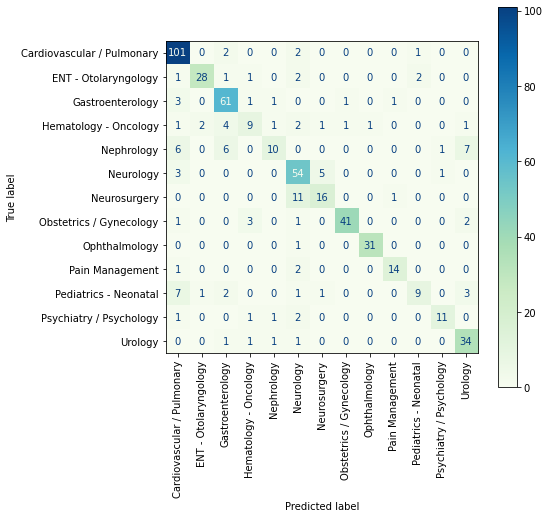

In [30]:
#Results from LinearSVC Classifier:

accuracy_2=accuracy_score(y_test, pred2)
print("Accuracy scored from LinearSVC classifier: ",accuracy_2,"\n")
conmax2=confusion_matrix(y_test, pred2)
precision2 = precision_score(y_test, pred2,average='macro')
print('Precision: %f' % precision2)
recall2 = recall_score(y_test, pred2,average='macro')
print('Recall: %f' % recall2)
f1_2 = f1_score(y_test, pred2,average='macro')
print('F1 score: %f' % f1_2)
print("Confusion_matrix of LinearSVC classifier:")
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(LinearSVC_fit,X_test,y_test,display_labels=target.classes_,
                      cmap='GnBu',xticks_rotation='vertical',
                      normalize=None,values_format='g',
                      ax=ax)
plt.savefig('LinearSVC_fit.svg')

In [31]:
#Logistic Regression

pipeline3 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression(random_state = 1)),
])


parameters3 = {
    'vect__ngram_range': ((1,3),(1,2)),  # unigrams or bigrams
    'vect__analyzer': ('word','char'),
    'vect__max_df':[0.75,0.95],
    'vect__min_df': [5],
    'vect__max_features': [2000],
    'clf__penalty':['elasticnet'],
     'clf__l1_ratio':[0.5,0.6],
    'clf__solver' : ['saga'],
    'clf__multi_class':['multinomial'],
    }
grid_search3 = GridSearchCV(pipeline3,parameters3, cv=kfold, n_jobs=-1, verbose=1) #verbose = 1, cv = kfold, n_jobs = 3)
Logit_fit=grid_search3.fit(X_train, y_train)
Logit_fit_model = grid_search3.best_estimator_
pred3 = Logit_fit_model.predict(X_test) 
print("Best parameter (Best CV score=%0.3f) from Logistic Regression classifier:" % grid_search3.best_score_)
print(grid_search3.best_params_)

print("Classification Report of Logistic Regression classifier: ")
print(classification_report(y_test, pred3),"\n")



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameter (Best CV score=0.749) from Logistic Regression classifier:
{'clf__l1_ratio': 0.5, 'clf__multi_class': 'multinomial', 'clf__penalty': 'elasticnet', 'clf__solver': 'saga', 'vect__analyzer': 'word', 'vect__max_df': 0.95, 'vect__max_features': 2000, 'vect__min_df': 5, 'vect__ngram_range': (1, 3)}
Classification Report of Logistic Regression classifier: 
                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.66      0.97      0.79       106
      ENT - Otolaryngology       0.93      0.71      0.81        35
          Gastroenterology       0.80      0.87      0.83        68
     Hematology - Oncology       0.62      0.35      0.44        23
                Nephrology       0.80      0.40      0.53        30
                 Neurology       0.70      0.84      0.76        63
              Neurosurgery       0.72      0.46      0.57        28
   Obstetrics / Gynecology 

Accuracy scored from Logistic Regression classifier:  0.7651515151515151 

Precision: 0.805770
Recall: 0.677831
F1 score: 0.713431
Confusion_matrix of Logistic Regression classifier:


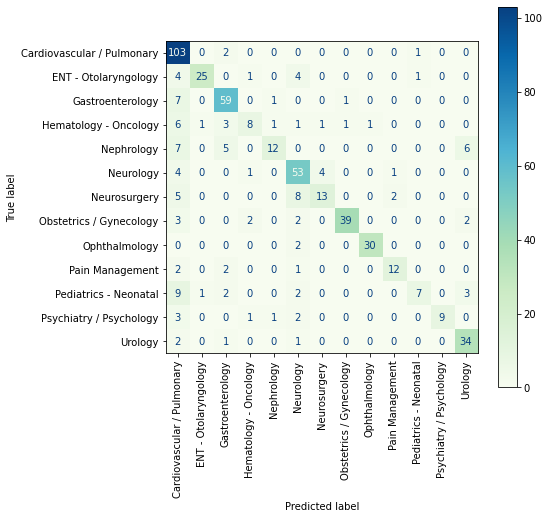

In [32]:
#Results from Logistic Regression Classifier:

accuracy_3=accuracy_score(y_test, pred3)
print("Accuracy scored from Logistic Regression classifier: ",accuracy_3,"\n")
conmax3=confusion_matrix(y_test, pred3)
precision3 = precision_score(y_test, pred3,average='macro')
print('Precision: %f' % precision3)
recall3 = recall_score(y_test, pred3,average='macro')
print('Recall: %f' % recall3)
f1_3 = f1_score(y_test, pred3,average='macro')
print('F1 score: %f' % f1_3)
print("Confusion_matrix of Logistic Regression classifier:")
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(Logit_fit,X_test,y_test,display_labels=target.classes_,
                      cmap='GnBu',xticks_rotation='vertical',
                      normalize=None,values_format='g',
                      ax=ax)
plt.savefig('Logit_fit.svg')

In [33]:
#Random Forest Classifier

pipeline4 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', RandomForestClassifier()),])


parameters4 = {
    
    'vect__ngram_range': ((1,3),(1,2)),  # unigrams or bigrams
    'vect__analyzer': ('word','char'),
    'vect__max_df':[0.75,0.95],
    'vect__min_df': [5],
    'vect__max_features': [2000],
    'clf__n_estimators' :[50,100], # number of trees in the random forest
     'clf__max_depth':[10,50],   # number of features in consideration at every split
    'clf__min_samples_split' : [30,50],# minimum sample number to split a node
    'clf__min_samples_leaf' :[ 5] # minimum sample number that can be stored in a leaf node
   }


grid_search4 = GridSearchCV(pipeline4, parameters4, cv=5,n_jobs=-1, verbose=1)

RF_fit=grid_search4.fit(X_train, y_train)

print("Best parameter (Best CV score=%0.3f) from RandomForest classifier:" % grid_search4.best_score_)
print(grid_search4.best_params_)
RF_fit_model= grid_search4.best_estimator_
pred4 = RF_fit_model.predict(X_test)

print("Classification Report of RandomForest classifier: ")
print(classification_report(y_test, pred4),"\n")


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameter (Best CV score=0.738) from RandomForest classifier:
{'clf__max_depth': 50, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 50, 'clf__n_estimators': 50, 'vect__analyzer': 'word', 'vect__max_df': 0.75, 'vect__max_features': 2000, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}
Classification Report of RandomForest classifier: 
                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.64      0.97      0.77       106
      ENT - Otolaryngology       0.89      0.71      0.79        35
          Gastroenterology       0.69      0.79      0.74        68
     Hematology - Oncology       0.33      0.04      0.08        23
                Nephrology       0.67      0.13      0.22        30
                 Neurology       0.68      0.78      0.73        63
              Neurosurgery       0.73      0.57      0.64        28
   Obstetrics / Gynecology       0.93      0.

Accuracy scored from RandomForest classifier:  0.7234848484848485 

Precision: 0.720581
Recall: 0.634067
F1 score: 0.640009
Confusion_matrix of RandomForest classifier:


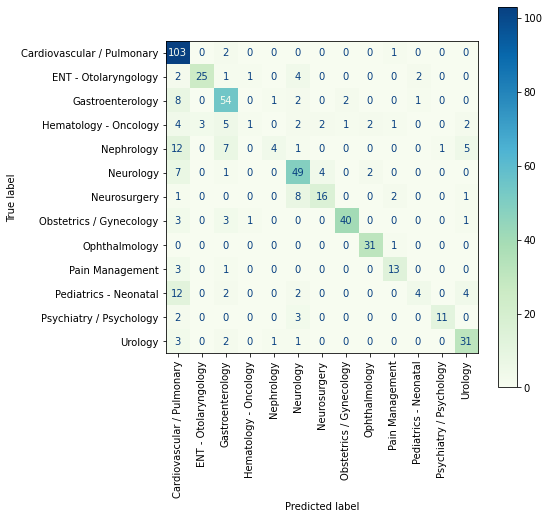

In [34]:
#Results from RandomForest Classifier:

accuracy_4=accuracy_score(y_test, pred4)
print("Accuracy scored from RandomForest classifier: ",accuracy_4,"\n")
conmax4=confusion_matrix(y_test, pred4)
precision4 = precision_score(y_test, pred4,average='macro')
print('Precision: %f' % precision4)
recall4 = recall_score(y_test, pred4,average='macro')
print('Recall: %f' % recall4)
f1_4 = f1_score(y_test, pred4,average='macro')
print('F1 score: %f' % f1_4)

print("Confusion_matrix of RandomForest classifier:")
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(RF_fit,X_test,y_test,display_labels=target.classes_,
                      cmap='GnBu',xticks_rotation='vertical',
                      normalize=None,values_format='g',
                      ax=ax)
plt.savefig('RF_fit.svg')

In [35]:
#Results from all classifications:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data={'Classification Tech':['Multinomial NB','Linear SVC','Logistic Regression','RandomForest'],
      'Best Score from CV': [grid_search1.best_score_,grid_search2.best_score_,grid_search3.best_score_,grid_search4.best_score_],
      'Accuracy': [accuracy_1,accuracy_2,accuracy_3,accuracy_4],
      'Precision': [precision1,precision2,precision3,precision4],
      'Recall': [recall1,recall2,recall3,recall4],
      'F1-score': [f1_1,f1_2,f1_3,f1_4]}
      
comparedf=round(pd.DataFrame(data),2)
comparedf


,Classification Tech,Best Score from CV,Accuracy,Precision,Recall,F1-score
0,Multinomial NB,0.77,0.75,0.74,0.71,0.71
1,Linear SVC,0.80,0.79,0.79,0.72,0.74
2,Logistic Regression,0.75,0.77,0.81,0.68,0.71
3,RandomForest,0.74,0.72,0.72,0.63,0.64


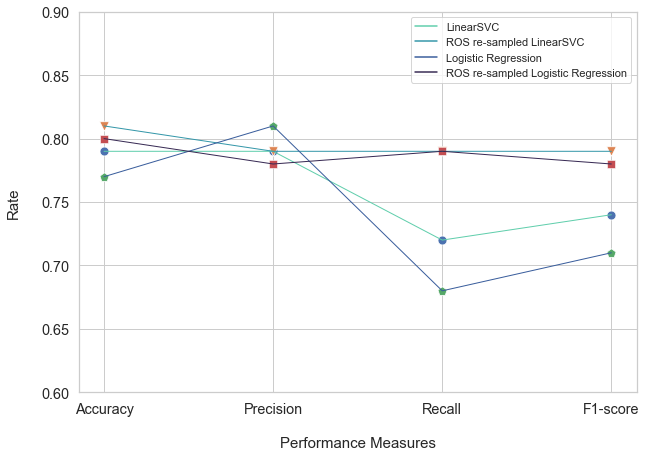

In [115]:
#Final Improved Classification Results plot:

data={'Classification Tech':['Accuracy','Precision','Recall','F1-score'],
       'LinearSVC': [  0.79, 0.79,0.72,0.74],
      'ROS re-sampled LinearSVC': [0.81,0.79,0.79,0.79],
      'Logistic Regression'   : [0.77,0.81,0.68,0.71],
      'ROS re-sampled Logistic Regression' : [0.80,0.78,0.79,0.78]}
plt.figure(figsize=(10,7))
palette = sns.color_palette("mako_r", 4)
data = pd.DataFrame(data)
#sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_style("whitegrid")
sns.scatterplot(x=[0,1,2,3],y=data['LinearSVC'], marker='o',s = 80, data = data)
sns.scatterplot(x=[0,1,2,3],y=data['ROS re-sampled LinearSVC'], marker='v',s = 90, data = data)
sns.scatterplot(x=[0,1,2,3],y=data['Logistic Regression'], marker='p',s = 90, data = data)
sns.scatterplot(x=[0,1,2,3],y=data['ROS re-sampled Logistic Regression'], marker='s',s = 50, data = data)

g=sns.lineplot(data=data, palette=palette, linewidth=1, dashes=False)



#g = sns.scatterplot(data = df, y  = s_y, x = s_x)
g.set_xticks([0,1,2,3])
#g.set_xticklabels(['0','a','b','c','d','e'])

x_labels=['Accuracy','Precision','Recall','F1-score']
#sns.set_yticklabels(y_labels)
g.set_xticklabels(x_labels)
g.set(ylim=(0.6,0.9))
g.legend(bbox_to_anchor=(1, 1.0), loc='best')

#plt.yticks(rotation=0)
plt.xlabel('Performance Measures',fontsize=15,labelpad=20)
plt.ylabel('Rate',fontsize=15,labelpad=20)

plt.tick_params(direction='out', labelsize='large')
plt.savefig('measures.svg')


In [116]:
data

,Classification Tech,LinearSVC,ROS re-sampled LinearSVC,Logistic Regression,ROS re-sampled Logistic Regression
0,Accuracy,0.79,0.81,0.77,0.80
1,Precision,0.79,0.79,0.81,0.78
2,Recall,0.72,0.79,0.68,0.79
3,F1-score,0.74,0.79,0.71,0.78
